In [63]:
import pandas as pd
from matplotlib import pyplot as plt

In [64]:
dataset_raw = pd.read_csv('ceidg_data_classif.csv')

index_True = dataset_raw['Target']==True # Failed businesses
index_False = dataset_raw['Target']==False # Successful businesses

months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'Octobe', 'November', 'December']

In [65]:
population_dict = pd.DataFrame(columns=['Name', 'TERC', 'TotalPopulation', 'ManPopulation', 'WomanPopulation'])

for sheet_index in range(1, 17):
    population_dict_tmp = pd.read_excel('LUD_bilans_ludnosci_31-12-2011.xls',
                                        sheet_name=sheet_index,
                                        skiprows=4)
    population_dict_tmp = population_dict_tmp.iloc[:, 0:5].dropna()
    
    population_dict_tmp = population_dict_tmp.rename(
        columns={population_dict_tmp.columns[0]: 'Name',
                 population_dict_tmp.columns[1]: 'TERC',
                 population_dict_tmp.columns[2]: 'TotalPopulation',
                 population_dict_tmp.columns[3]: 'ManPopulation',
                 population_dict_tmp.columns[4]: 'WomanPopulation'})
    
    population_dict_tmp['TERC'] = population_dict_tmp['TERC'].astype(int).astype(str)
    
    population_dict_tmp['TotalPopulation'] = population_dict_tmp['TotalPopulation'].astype(int)
    population_dict_tmp['ManPopulation'] = population_dict_tmp['ManPopulation'].astype(int)
    population_dict_tmp['WomanPopulation'] = population_dict_tmp['WomanPopulation'].astype(int)
    
    population_dict = population_dict.append(population_dict_tmp, ignore_index=True)
    population_dict_tmp = None

In [66]:
population_dict

,Name,TERC,TotalPopulation,ManPopulation,WomanPopulation
0,DOLNOŚLĄSKIE,2,2916577,1402975,1513602
1,pow. bolesławiecki,201,90528,44040,46488
2,M.Bolesławiec,201011,40119,18985,21134
3,G.Bolesławiec,201022,13714,6824,6890
4,G.Gromadka,201032,5491,2742,2749
...,...,...,...,...,...
2837,M-W.Resko,3218043,8378,4159,4219
2838,M-W.Węgorzyno,3218053,7272,3686,3586
2839,M. Koszalin,3261011,109233,51635,57598
2840,M. Szczecin,3262011,409596,194850,214746


In [67]:
dataset_raw.shape

(2401055, 30)

In [68]:
dataset_raw_no_nan = dataset_raw.dropna(subset=['MainAddressTERC', 'CorrespondenceAddressTERC'])
dataset_raw_no_nan.shape

(2147712, 30)

In [69]:
dataset_raw_no_nan.columns

Index(['RandomDate', 'MonthOfStartingOfTheBusiness',
       'QuarterOfStartingOfTheBusiness', 'MainAddressVoivodeship',
       'MainAddressCounty', 'MainAddressTERC',
       'CorrespondenceAddressVoivodeship', 'CorrespondenceAddressCounty',
       'CorrespondenceAddressTERC', 'MainAndCorrespondenceAreTheSame',
       'DurationOfExistenceInMonths', 'NoOfAdditionalPlaceOfTheBusiness',
       'IsPhoneNo', 'IsEmail', 'IsWWW', 'CommunityProperty', 'HasLicences',
       'NoOfLicences', 'Sex', 'HasPolishCitizenship',
       'ShareholderInOtherCompanies', 'PKDMainSection', 'PKDMainDivision',
       'PKDMainGroup', 'PKDMainClass', 'NoOfUniquePKDSections',
       'NoOfUniquePKDDivsions', 'NoOfUniquePKDGroups', 'NoOfUniquePKDClasses',
       'Target'],
      dtype='object')

## Original features importance

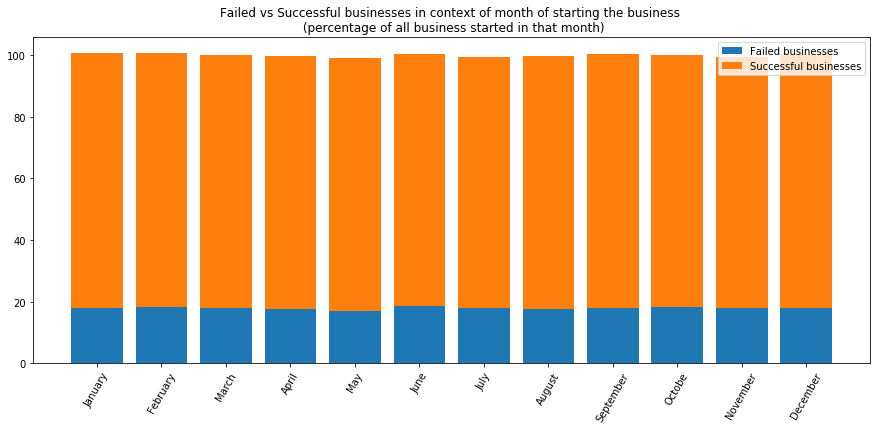

In [70]:
fig = plt.figure(figsize=(15,6))

scaler = dataset_raw_no_nan['MonthOfStartingOfTheBusiness'].value_counts() / 100

plt.bar(months,
        dataset_raw_no_nan['MonthOfStartingOfTheBusiness'][index_True].value_counts() / scaler,
        label='Failed businesses')

plt.bar(months,
        dataset_raw_no_nan['MonthOfStartingOfTheBusiness'][index_False].value_counts() / scaler,
        bottom=dataset_raw_no_nan['MonthOfStartingOfTheBusiness'][index_True].value_counts() / scaler,
        label='Successful businesses')

plt.xticks(rotation=60)

plt.title('Failed vs Successful businesses in context of month of starting the business \n (percentage of all business started in that month)')

plt.legend()

plt.show()

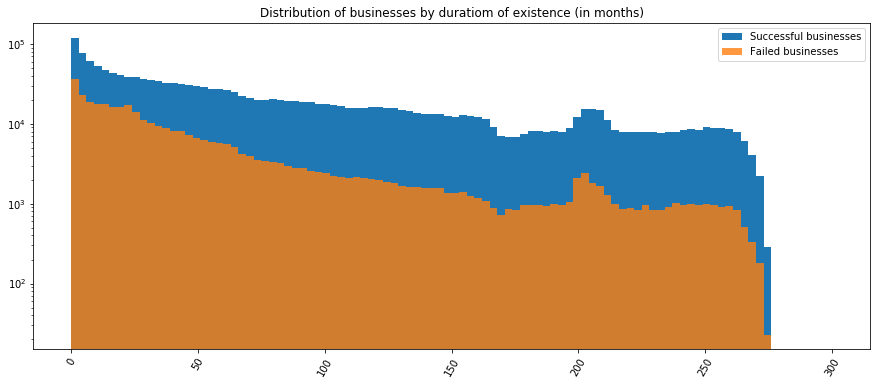

In [95]:
fig = plt.figure(figsize=(15,6))

limits = (0, 300)
bins = 100

plt.hist(dataset_raw_no_nan['DurationOfExistenceInMonths'][index_False],
        label='Successful businesses', alpha=1, range=limits, bins = bins)

plt.hist(dataset_raw_no_nan['DurationOfExistenceInMonths'][index_True],
        label='Failed businesses', alpha=0.8, range=limits, bins = bins)

plt.xticks(rotation=60)

plt.yscale('log')

plt.title('Distribution of businesses by duratiom of existence (in months)')

plt.legend()

plt.show()

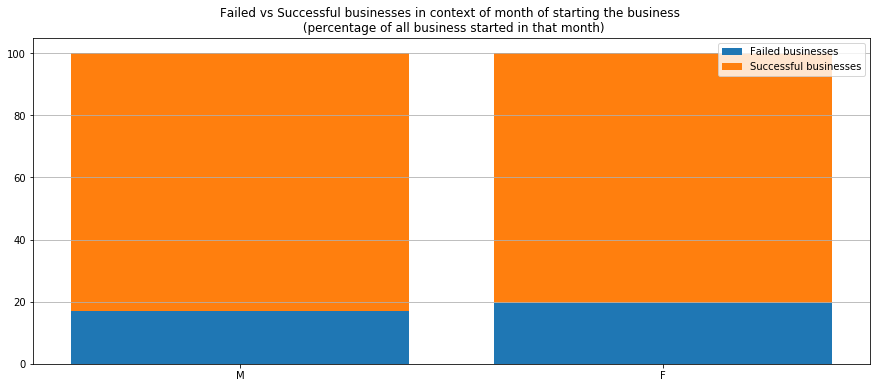

In [88]:
fig = plt.figure(figsize=(15,6))

scaler = dataset_raw_no_nan['Sex'].value_counts() / 100

plt.bar(['M', 'F'],
        dataset_raw_no_nan['Sex'][index_True].value_counts() / scaler,
        label='Failed businesses')

plt.bar(['M', 'F'],
        dataset_raw_no_nan['Sex'][index_False].value_counts() / scaler,
        bottom=dataset_raw_no_nan['Sex'][index_True].value_counts() / scaler,
        label='Successful businesses')

plt.xticks(rotation=0)

plt.title('Failed vs Successful businesses in context of month of starting the business \n (percentage of all business started in that month)')

plt.grid(axis='y')

plt.legend()

plt.show()

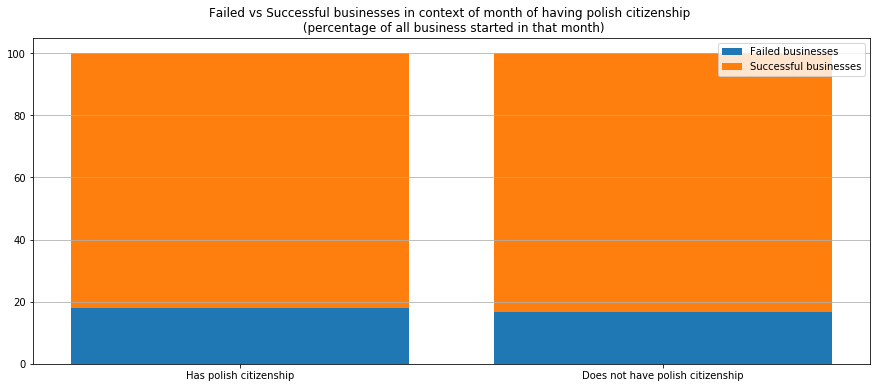

In [94]:
fig = plt.figure(figsize=(15,6))

scaler = dataset_raw_no_nan['HasPolishCitizenship'].value_counts() / 100

plt.bar(['Has polish citizenship', 'Does not have polish citizenship'],
        dataset_raw_no_nan['HasPolishCitizenship'][index_True].value_counts() / scaler,
        label='Failed businesses')

plt.bar(['Has polish citizenship', 'Does not have polish citizenship'],
        dataset_raw_no_nan['HasPolishCitizenship'][index_False].value_counts() / scaler,
        bottom=dataset_raw_no_nan['HasPolishCitizenship'][index_True].value_counts() / scaler,
        label='Successful businesses')

plt.xticks(rotation=0)

plt.title('Failed vs Successful businesses in context of having polish citizenship \n (percentage of all business started in that month)')

plt.grid(axis='y')

plt.legend()

plt.show()

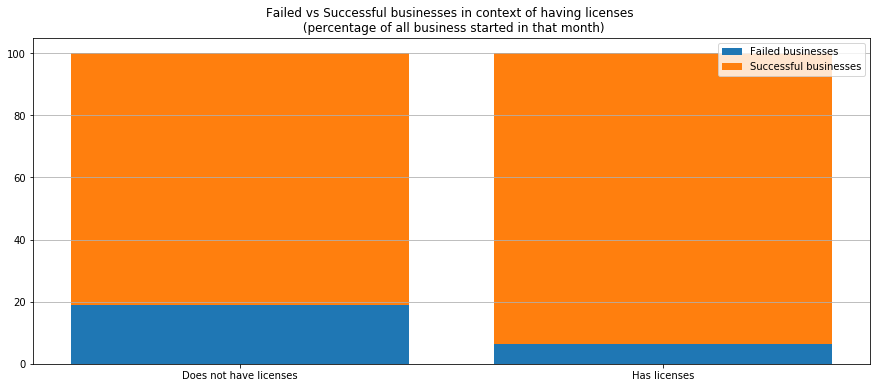

In [99]:
fig = plt.figure(figsize=(15,6))

scaler = dataset_raw_no_nan['HasLicences'].value_counts() / 100

plt.bar(['Does not have licenses', 'Has licenses'],
        dataset_raw_no_nan['HasLicences'][index_True].value_counts() / scaler,
        label='Failed businesses')

plt.bar(['Does not have licenses', 'Has licenses'],
        dataset_raw_no_nan['HasLicences'][index_False].value_counts() / scaler,
        bottom=dataset_raw_no_nan['HasLicences'][index_True].value_counts() / scaler,
        label='Successful businesses')

plt.xticks(rotation=0)

plt.title('Failed vs Successful businesses in context of having licenses \n (percentage of all business started in that month)')

plt.grid(axis='y')

plt.legend()

plt.show()

In [98]:
dataset_raw_no_nan['HasLicences'][index_True].value_counts() / scaler

False    18.889737
True      6.525890
Name: HasLicences, dtype: float64